# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.105161e+01     8.135250e+00
 * time: 0.0018990039825439453
     1     2.314313e+01     4.185435e+00
 * time: 0.008825063705444336
     2     1.648258e+01     3.595554e+00
 * time: 0.015731096267700195
     3     1.273536e+01     2.382911e+00
 * time: 0.021572113037109375
     4     9.961725e+00     1.291876e+00
 * time: 0.026746034622192383
     5     9.223828e+00     1.860277e+00
 * time: 0.031507015228271484
     6     8.741099e+00     1.175847e+00
 * time: 0.03589200973510742
     7     8.472479e+00     7.961030e-01
 * time: 0.04087519645690918
     8     8.311689e+00     9.525920e-01
 * time: 0.09021902084350586
     9     8.275526e+00     8.296795e-01
 * time: 0.0932002067565918
    10     8.246208e+00     7.421042e-01
 * time: 0.09605216979980469
    11     8.240311e+00     1.001146e+00
 * time: 0.0989840030670166
    12     8.150341e+00     4.959490e-01
 * time: 0.10269021987915039
    13     8.126966e+00     7.912038e-01
 * 

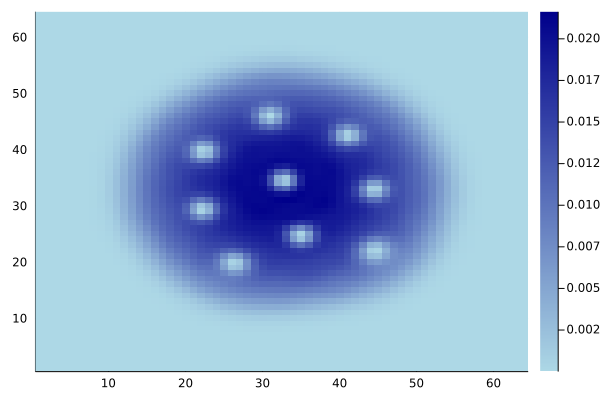

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)